     Chemical Composition (%)  Casting Temp (°C)  Cooling Water Temp (°C)  \
0                       99.71              734.9                     23.7   
1                       99.89              726.8                     30.8   
2                       99.82              715.5                     37.5   
3                       99.78              740.7                     34.6   
4                       99.65              734.2                     36.1   
..                        ...                ...                      ...   
495                     99.71              704.6                     33.4   
496                     99.78              745.9                     32.4   
497                     99.62              706.8                     29.3   
498                     99.89              747.5                     27.6   
499                     99.90              722.3                     37.3   

     Cooling Water Pressure (bar)  Casting Speed (m/min)  \
0              

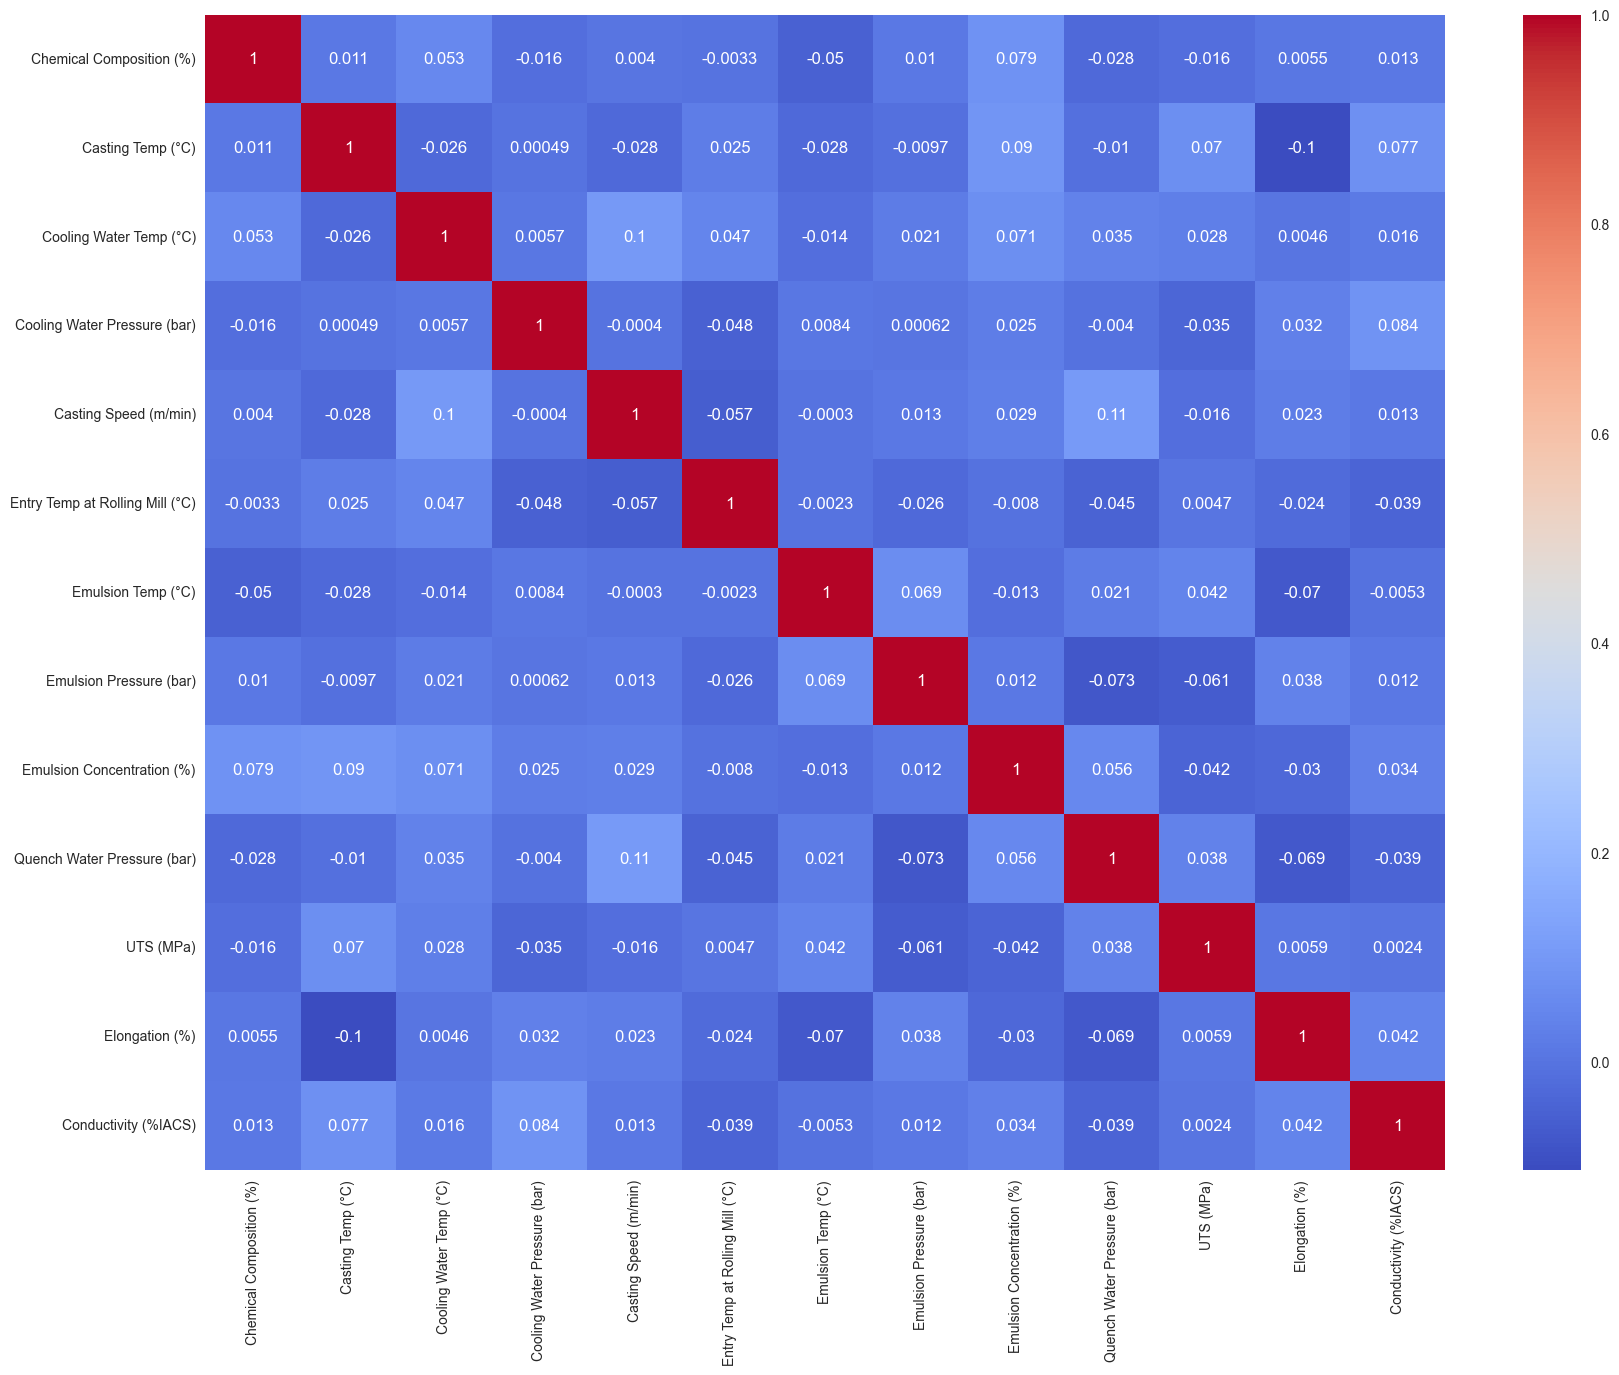

,Description,Value
0,Session id,2424
1,Target,UTS (MPa)
2,Target type,Regression
3,Original data shape,"(500, 13)"
4,Transformed data shape,"(500, 13)"
5,Transformed train set shape,"(350, 13)"
6,Transformed test set shape,"(150, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,7.5595,78.7275,8.8487,-0.0497,0.0410,0.0352,0.0090
br,Bayesian Ridge,7.5596,78.7422,8.8496,-0.0499,0.0410,0.0352,0.0290
omp,Orthogonal Matching Pursuit,7.5521,79.1559,8.8731,-0.0554,0.0411,0.0352,0.0280
lasso,Lasso Regression,7.5898,79.6547,8.9043,-0.0638,0.0412,0.0354,0.2350
llar,Lasso Least Angle Regression,7.5898,79.6547,8.9043,-0.0638,0.0412,0.0354,0.0290
en,Elastic Net,7.6101,79.9772,8.9236,-0.0687,0.0413,0.0354,0.0390
ridge,Ridge Regression,7.6778,82.1841,9.0503,-0.1013,0.0419,0.0358,0.0170
lr,Linear Regression,7.6846,82.3266,9.0582,-0.1032,0.0419,0.0358,0.4800
lar,Least Angle Regression,7.6877,82.4165,9.0637,-0.1047,0.0420,0.0358,0.0310
ada,AdaBoost Regressor,7.7085,83.4441,9.0988,-0.1104,0.0422,0.0360,0.0240


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

=== Neural Network Predictions Evaluation ===
Neural Network R²: -31.95
Neural Network MAE: 48.41

=== Random Forest Predictions Evaluation ===
Random Forest R²: -0.07
Random Forest MAE: 7.61


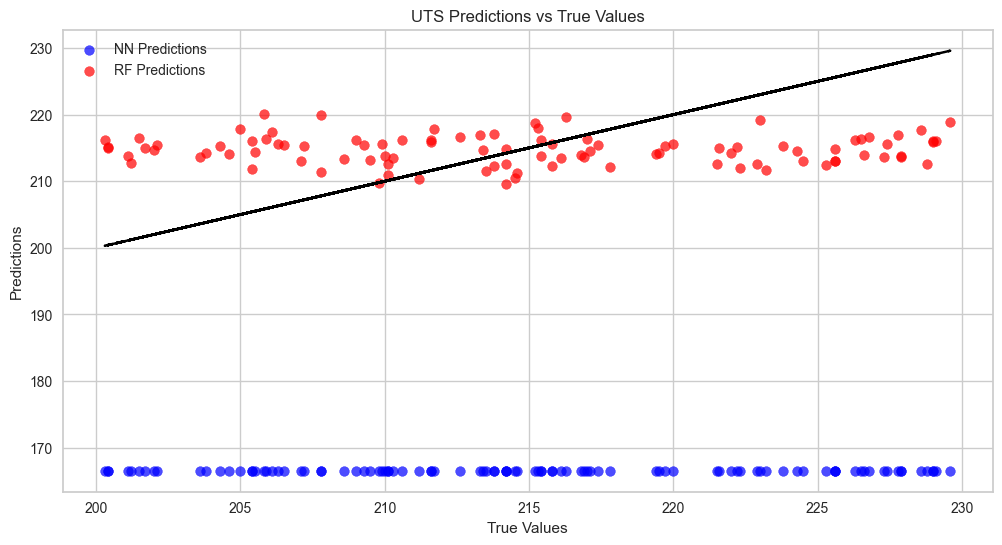

,Description,Value
0,Session id,6649
1,Target,Elongation (%)
2,Target type,Regression
3,Original data shape,"(500, 13)"
4,Transformed data shape,"(500, 13)"
5,Transformed train set shape,"(350, 13)"
6,Transformed test set shape,"(150, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.5046,0.3408,0.5832,-0.0153,0.0486,0.0460,0.0070
en,Elastic Net,0.5078,0.3423,0.5844,-0.0187,0.0487,0.0463,0.0080
br,Bayesian Ridge,0.5085,0.3429,0.5850,-0.0206,0.0487,0.0463,0.0080
ada,AdaBoost Regressor,0.5036,0.3446,0.5857,-0.0243,0.0488,0.0458,0.0190
dummy,Dummy Regressor,0.5115,0.3454,0.5871,-0.0269,0.0489,0.0466,0.0070
llar,Lasso Least Angle Regression,0.5112,0.3457,0.5873,-0.0279,0.0489,0.0466,0.0070
lasso,Lasso Regression,0.5112,0.3457,0.5873,-0.0279,0.0489,0.0466,0.0090
ridge,Ridge Regression,0.5071,0.3460,0.5874,-0.0318,0.0489,0.0462,0.0070
lar,Least Angle Regression,0.5074,0.3463,0.5876,-0.0327,0.0490,0.0462,0.0090
lr,Linear Regression,0.5074,0.3463,0.5876,-0.0327,0.0490,0.0462,0.0070


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

=== Neural Network Predictions Evaluation ===
Neural Network R²: -0.01
Neural Network MAE: 0.54

=== Random Forest Predictions Evaluation ===
Random Forest R²: -0.02
Random Forest MAE: 0.54


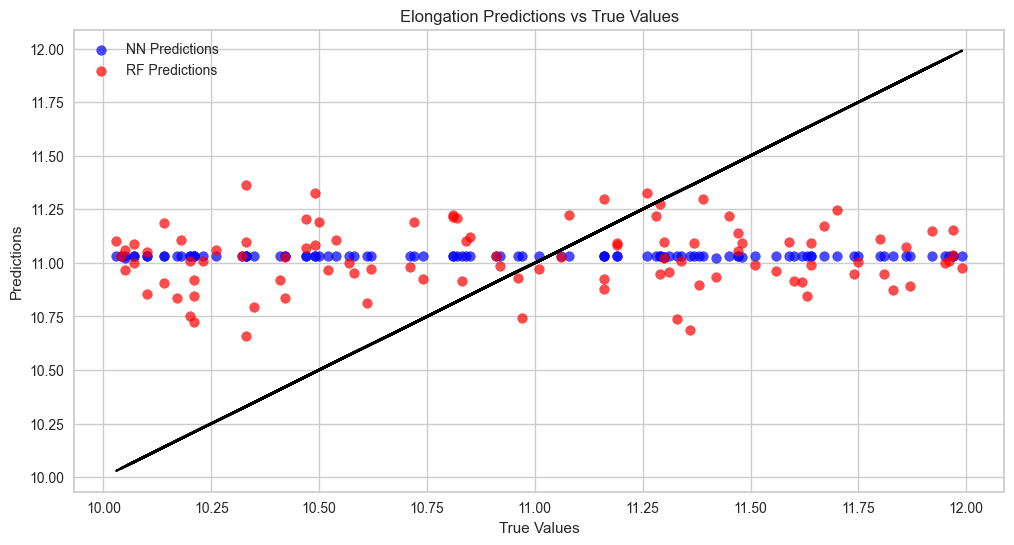

,Description,Value
0,Session id,1418
1,Target,Conductivity (%IACS)
2,Target type,Regression
3,Original data shape,"(500, 13)"
4,Transformed data shape,"(500, 13)"
5,Transformed train set shape,"(350, 13)"
6,Transformed test set shape,"(150, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,1.2408,2.0896,1.4374,-0.0360,0.0234,0.0205,0.0080
llar,Lasso Least Angle Regression,1.2432,2.0962,1.4395,-0.0389,0.0234,0.0206,0.0080
lasso,Lasso Regression,1.2432,2.0962,1.4395,-0.0389,0.0234,0.0206,0.0080
br,Bayesian Ridge,1.2439,2.0978,1.4402,-0.0400,0.0234,0.0206,0.0090
en,Elastic Net,1.2496,2.1167,1.4463,-0.0484,0.0235,0.0207,0.0080
omp,Orthogonal Matching Pursuit,1.2557,2.1369,1.4529,-0.0582,0.0236,0.0208,0.0080
et,Extra Trees Regressor,1.2805,2.2448,1.4902,-0.1194,0.0242,0.0212,0.0330
ada,AdaBoost Regressor,1.2822,2.2504,1.4927,-0.1214,0.0243,0.0212,0.0170
ridge,Ridge Regression,1.2955,2.2460,1.4923,-0.1216,0.0243,0.0214,0.0070
lr,Linear Regression,1.2981,2.2548,1.4951,-0.1257,0.0243,0.0215,0.0080


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000019DD928AA60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

=== Neural Network Predictions Evaluation ===
Neural Network R²: -0.01
Neural Network MAE: 1.18

=== Random Forest Predictions Evaluation ===
Random Forest R²: -0.09
Random Forest MAE: 1.24


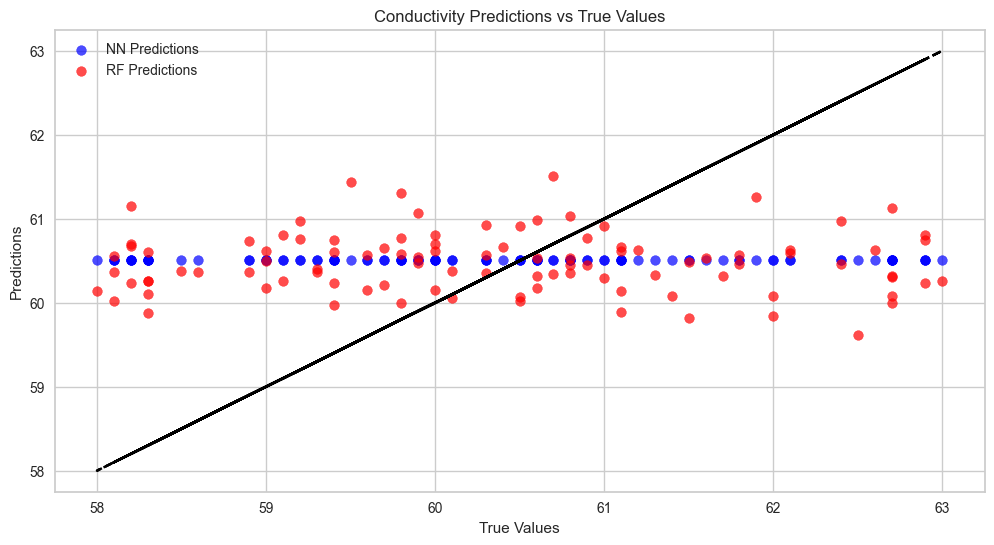


=== Final Results Summary ===
                         Model         R²        MAE
0           Neural Network UTS -31.952204  48.410309
1            Random Forest UTS  -0.067729   7.613440
2    Neural Network Elongation  -0.012238   0.538769
3     Random Forest Elongation  -0.022693   0.535678
4  Neural Network Conductivity  -0.012223   1.180031
5   Random Forest Conductivity  -0.086416   1.236940
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

=== Predictions for New Input Data ===
Predicted UTS (Neural Network): 166.52 MPa
Predicted UTS (Random Forest): 214.91 MPa
Predicted Elongation (Neural Network): 11.03 %
Predicted Elongation (Random Forest): 10.98 %
Predicted Conductivity (Neural Network): 60.51 %IACS
Predicted Conductivity (Random Forest): 60.93 %IACS


In [1]:

# Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from pycaret.regression import *

# Load your dataset from CSV file
file_path = r'd:\Downloads\wire_rod_properties_dataset.csv'
dataset = pd.read_csv(file_path)
print(dataset)

# Display the first few rows of the dataset to verify loading
print(dataset.head())

df1 = dataset.copy()

# Visualization: Heatmap
plt.subplots(figsize=(20, 15))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()

# Feature selection
X = dataset.drop(columns=['UTS (MPa)', 'Elongation (%)', 'Conductivity (%IACS)'])
y_uts = dataset['UTS (MPa)']
y_elongation = dataset['Elongation (%)']
y_conductivity = dataset['Conductivity (%IACS)']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to evaluate model performance
def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"\n=== {model_name} Predictions Evaluation ===")
    print(f"{model_name} R²: {r2:.2f}")
    print(f"{model_name} MAE: {mae:.2f}")
    return r2, mae

# Initialize lists to store results
results = {
    'Model': [],
    'R²': [],
    'MAE': []
}

# Model for UTS
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_uts, train_size=0.8, shuffle=True, random_state=2)

# Initialize PyCaret regression setup for UTS
s = setup(data=dataset, target='UTS (MPa)', verbose=True)

# Compare models and choose the best
best_model = compare_models()

# Initialize Neural Network Model for UTS
nn_model = Sequential()
nn_model.add(Dense(units=15, activation='tanh', input_dim=X_train.shape[1]))
nn_model.add(Dense(units=30, activation='tanh'))
nn_model.add(Dense(units=45, activation='tanh'))
nn_model.add(Dense(units=40, activation='tanh'))
nn_model.add(Dense(units=30, activation='tanh'))
nn_model.add(Dense(units=20, activation='tanh'))
nn_model.add(Dense(units=10, activation='tanh'))

nn_model.add(Dense(units=1))  # Single output for UTS

nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

history_uts = nn_model.fit(X_train, y_train, batch_size=5, epochs=200, verbose=0)

# Predictions and Evaluation for Neural Network UTS
y_nn_pred_uts = nn_model.predict(X_test).flatten()  # Flattening to match y_test shape

# Random Forest Model for UTS
rf_model_uts = RandomForestRegressor(n_estimators=100)
rf_model_uts.fit(X_train, y_train)
y_rf_pred_uts = rf_model_uts.predict(X_test)

# Evaluate UTS models
r2_nn_uts, mae_nn_uts = evaluate_model(y_test, y_nn_pred_uts, "Neural Network")
results['Model'].append('Neural Network UTS')
results['R²'].append(r2_nn_uts)
results['MAE'].append(mae_nn_uts)

r2_rf_uts, mae_rf_uts = evaluate_model(y_test, y_rf_pred_uts, "Random Forest")
results['Model'].append('Random Forest UTS')
results['R²'].append(r2_rf_uts)
results['MAE'].append(mae_rf_uts)

# Visualization of Predictions vs True Values for UTS
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_nn_pred_uts, color='blue', label='NN Predictions', alpha=0.7)
plt.scatter(y_test, y_rf_pred_uts, color='red', label='RF Predictions', alpha=0.7)
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.title('UTS Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

# Model for Elongation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_elongation, train_size=0.8, shuffle=True, random_state=2)

# Initialize PyCaret regression setup for Elongation
s = setup(data=dataset, target='Elongation (%)', verbose=True)

# Compare models and choose the best
best_model_elongation = compare_models()

# Initialize Neural Network Model for Elongation
nn_model_elongation = Sequential()
nn_model_elongation.add(Dense(units=15, activation='tanh', input_dim=X_train.shape[1]))
nn_model_elongation.add(Dense(units=30, activation='tanh'))
nn_model_elongation.add(Dense(units=45, activation='tanh'))
nn_model_elongation.add(Dense(units=40, activation='tanh'))
nn_model_elongation.add(Dense(units=30, activation='tanh'))
nn_model_elongation.add(Dense(units=20, activation='tanh'))
nn_model_elongation.add(Dense(units=10, activation='tanh'))
nn_model_elongation.add(Dense(units=1))  # Single output for Elongation

nn_model_elongation.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

history_elongation = nn_model_elongation.fit(X_train, y_train, batch_size=5, epochs=200, verbose=0)

# Predictions and Evaluation for Neural Network Elongation
y_nn_pred_elongation = nn_model_elongation.predict(X_test).flatten()

# Random Forest Model for Elongation
rf_model_elongation = RandomForestRegressor(n_estimators=100)
rf_model_elongation.fit(X_train, y_train)
y_rf_pred_elongation = rf_model_elongation.predict(X_test)

# Evaluate Elongation models
r2_nn_elongation, mae_nn_elongation = evaluate_model(y_test, y_nn_pred_elongation, "Neural Network")
results['Model'].append('Neural Network Elongation')
results['R²'].append(r2_nn_elongation)
results['MAE'].append(mae_nn_elongation)

r2_rf_elongation, mae_rf_elongation = evaluate_model(y_test, y_rf_pred_elongation, "Random Forest")
results['Model'].append('Random Forest Elongation')
results['R²'].append(r2_rf_elongation)
results['MAE'].append(mae_rf_elongation)

# Visualization of Predictions vs True Values for Elongation
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_nn_pred_elongation, color='blue', label='NN Predictions', alpha=0.7)
plt.scatter(y_test, y_rf_pred_elongation, color='red', label='RF Predictions', alpha=0.7)
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.title('Elongation Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

# Model for Conductivity
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_conductivity, train_size=0.8, shuffle=True, random_state=2)

# Initialize PyCaret regression setup for Conductivity
s = setup(data=dataset, target='Conductivity (%IACS)', verbose=True)

# Compare models and choose the best
best_model_conductivity = compare_models()

# Initialize Neural Network Model for Conductivity
nn_model_conductivity = Sequential()
nn_model_conductivity.add(Dense(units=15, activation='tanh', input_dim=X_train.shape[1]))
nn_model_conductivity.add(Dense(units=30, activation='tanh'))
nn_model_conductivity.add(Dense(units=45, activation='tanh'))
nn_model_conductivity.add(Dense(units=40, activation='tanh'))
nn_model_conductivity.add(Dense(units=30, activation='tanh'))
nn_model_conductivity.add(Dense(units=20, activation='tanh'))
nn_model_conductivity.add(Dense(units=10, activation='tanh'))
nn_model_conductivity.add(Dense(units=1))  # Single output for Conductivity

nn_model_conductivity.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

history_conductivity = nn_model_conductivity.fit(X_train, y_train, batch_size=5, epochs=200, verbose=0)

# Predictions and Evaluation for Neural Network Conductivity
y_nn_pred_conductivity = nn_model_conductivity.predict(X_test).flatten()  # Flattening to match y_test shape

# Random Forest Model for Conductivity
rf_model_conductivity = RandomForestRegressor(n_estimators=100)
rf_model_conductivity.fit(X_train, y_train)
y_rf_pred_conductivity = rf_model_conductivity.predict(X_test)

# Evaluate Conductivity models
r2_nn_conductivity, mae_nn_conductivity = evaluate_model(y_test, y_nn_pred_conductivity, "Neural Network")
results['Model'].append('Neural Network Conductivity')
results['R²'].append(r2_nn_conductivity)
results['MAE'].append(mae_nn_conductivity)

r2_rf_conductivity, mae_rf_conductivity = evaluate_model(y_test, y_rf_pred_conductivity, "Random Forest")
results['Model'].append('Random Forest Conductivity')
results['R²'].append(r2_rf_conductivity)
results['MAE'].append(mae_rf_conductivity)

# Visualization of Predictions vs True Values for Conductivity
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_nn_pred_conductivity, color='blue', label='NN Predictions', alpha=0.7)
plt.scatter(y_test, y_rf_pred_conductivity, color='red', label='RF Predictions', alpha=0.7)
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.title('Conductivity Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

# Final results summary
results_df = pd.DataFrame(results)
print("\n=== Final Results Summary ===")
print(results_df)

# New input data for prediction
new_data = np.array([[99.71, 734.9, 23.7, 3.04, 3.79, 532.8, 63.5, 1.57, 3.72, 3.8]])

# Scale the new data using the scaler fitted on training data
new_data_scaled = scaler.transform(new_data)

# Predict UTS, Elongation, and Conductivity using the trained models
predicted_uts = nn_model.predict(new_data_scaled).flatten()[0]  # For Neural Network
predicted_uts_rf = rf_model_uts.predict(new_data_scaled)[0]  # For Random Forest

predicted_elongation = nn_model_elongation.predict(new_data_scaled).flatten()[0]  # For Neural Network
predicted_elongation_rf = rf_model_elongation.predict(new_data_scaled)[0]  # For Random Forest

predicted_conductivity = nn_model_conductivity.predict(new_data_scaled).flatten()[0]  # For Neural Network
predicted_conductivity_rf = rf_model_conductivity.predict(new_data_scaled)[0]  # For Random Forest

# Display predictions
print("\n=== Predictions for New Input Data ===")
print(f"Predicted UTS (Neural Network): {predicted_uts:.2f} MPa")
print(f"Predicted UTS (Random Forest): {predicted_uts_rf:.2f} MPa")
print(f"Predicted Elongation (Neural Network): {predicted_elongation:.2f} %")
print(f"Predicted Elongation (Random Forest): {predicted_elongation_rf:.2f} %")
print(f"Predicted Conductivity (Neural Network): {predicted_conductivity:.2f} %IACS")
print(f"Predicted Conductivity (Random Forest): {predicted_conductivity_rf:.2f} %IACS")
  